# Applied Data Science Capstone Project

This a jupyter notebook for the final project of the Applied data science specialization from Coursera IBM path career
The project will use a car accident dataset to predict the severity of an accident.

# Introduction/Business Problem 

Nowadays the car is one of the most used medium to travel, to go to work, move between cities,etc. This phenomenon increases the number of cars in the streets and the possibilities of accidents between cars, cyclist or pedestrians.

Also conditions like location, weather, road staus, speed, light and others can influence  the accident odds and this could result in injuries, car and property damage, fatalities, financial impact, medical bills, emotional impact or long-term consequences.

Stakeholder groups that are affected for the car accidents are drivers, pedestrians, cyclist, local and regional authorities and others involved in the accidents.

Taking that in consideration the question or problem to be answered with this project is knowing certain conditions (weather, location, day, road status,etc) what is the probability to have a car accident predicting the severity of it.

This will help the stakeholders in different ways, for example:

- Avoiding to drive when there are some risky conditions
- Drive carefully due to certain conditions
- Reduce fatalities
- Reduce medical bills
- Minimizing fatal/injury car crash
- Identify locations with highest accidents rate and take actions


---
# DATA UNDERSTANDING
---

In order to address the problem, there is a dataset called **Collision -All Years** which has data for the Seattle city car accidents.
The file is in .csv format, and can be found in this link: [DATASET](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv), also a description for each file is [HERE](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)

The dataset contains **194673** observations and **38** features or columns, this is the list of features:

| FIELD       | TYPE       | FIELD     | TYPE       | FIELD     | TYPE      | FIELD     | TYPE      | FIELD     | TYPE      |
| ----------- | ----------- |-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
|SEVERITYCODE | int64       |ADDRTYPE   | object    |PERSONCOUNT| int64     |SDOT_COLDESC|object    |SPEEDING   |object     |
|X            | float64     |INTKEY     | float64   |PEDCOUNT   | int64     |INATTENTIONIND|object  |ST_COLCODE |object     |
|Y            | floa64      |LOCATION   | object    |PEDCYLCOUNT| int64     |UNDERINFL  |object     |ST_COLDESC |object     |
|OBJECTID     | int64       |EXCEPTRSNCODE |object  |VEHCOUNT   | int64     |WEATHER    |object     |SEGLANEKEY |int64      |
|INCKEY       | int64       |EXCEPTRSNDESC |object  |INCDATE    | object    |ROADCOND   |object     |CROSSWALKKEY|int64     |
|COLDETKEY    | int64       |SEVERITYCODE.1|int64   |INCDTTM    | object    |LIGHTCOND  |object     |HITPARKEDCAR|object    |
|REPORTNO     | object      |SEVERITYDESC  |object  |JUNCTIONTYPE|object    |PEDROWNOTGRNT|object   |            |          |
|STATUS       | object      |COLLISIONTYPE |object  |SDOT_COLCODE|int64     |SDOTCOLNUM|float64     |            |          |

The first column **SEVERITYCODE** which describes the fatality of an accident will be used as the target or labeled data, the other columns have different types of attributes, many of the observations are good to train and test the machine learning model.

Analyzing the dataset 

- 6 of the features have many missing values, for the modelling those features that have more than 50% missing data will not be used for 
trainning or testing.

| FIELD       | %NaN VALUES      | FIELD          | %NaN Values  | FIELD        | %NaN Values  | 
| ----------- | ---------------- |----------------|--------------|--------------|--------------|
|INTKEY       | 66.57%           | EXCEPTRSNDESC  | 97.10%       |INATTENTIONIND| 84.69%       |
|PEDROWNOTGRNT| 97.60%           | SPEEDING       | 95.20%.      |EXCEPTRSNCODE | 56.43%       |


- The target label is unbalance with 136485 for value 1 and 58188 for value 2 severity codes,  so for trainning this columns must be balance

- The target is duplicate with the feature SEVERITYCODE.1 and SEVERITYDESC, so these features will not be considered

- There are features that are unique values that does not add significance to the model, so won´t be used as features for modelling

| FIELD       | FIELD     | FIELD      | FIELD          | 
| ----------- | ----------|----------- |----------------|
| OBJECTID     | COLDEKEY  | INTKEY    | CROSSWALKKEY   |
| INCKEY       | REPORTNO  | SEGLANEKEY| SDOTCOLNUM     |

- The features X, Y and LOCATION describe the same characteristic, so only one of this will be used

- The feature status is totally umbalanced and is very similar to the target so won´t be used

- INCDATE and INCDTTM have the same date info so only INCOTTM will be used that have in addition the hour

- ADDRTYPE and JUNCTIONTYPE have the same information with JUNCTIONTYPE wiht more detail, so only this will be used

- FOR PEDCOUNT and PEDCYLCOUNT both are considered in the field COLLISIONTYPE so are not used

- SDOT_COLDESC and ST_COLDESC are descriptions of SDOT_COLCODE, ST_COLCODE are reduntdant and not used

- SDOT_COLCODE and ST_COLCODE describe similar conditions so only ST_COLCODE is used it has a better distribution

- HITPARKEDCAR is unbalanced and this characteristic is also included in the ST_COLCODE so is not used

- WEATHER and ROADCOND share similar characteristics and have a direct relation so only ROADCOND is used

- VEHCOUNT and PERSONCOUNT have many outliers so will need some cleaning to be used in the model

- UNDERINFL has letters (Y/N) mix with numbers (1/0) so needs to be fixed to be used in the model

#### The features to be used in the model are:

LABEL: SEVERITY

FEATURES:

1. X: Geographic location of the accident
2. COLLISIONTYPE: Type of collision
3. VEHCOUNT: Number of vehicles involve in the accident
4. PERSONCOUNT: Number of persons involve in the accident
5. INCDTTM: Date and hour of the accident
6. JUNCTIONTYPE: Category of junction at which collision took place
7. UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol.
8. ROADCOND: Conditions of the road
9. LIGHTCOND: Light conditions
10. ST_COLCODE: A code provided by the state that describes the collision 

The following graphs and descriptive statistics  shows the characteristics of the dataset to chose the features to use in the model.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset using pandas
df = pd.read_csv('Data-Collisions.csv',low_memory=False)
print('Dataset read')

Dataset read


### Dataset example

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Here is the data shape of the dataset with 194673 observations and 38 columns

In [4]:
#Dataset shape
df.shape

(194673, 38)

### Features with more than 50% NaN Values

In [5]:
nulls = df.isnull().sum()
nulls = nulls/df.shape[0]*100
nulls = nulls[nulls > 50]

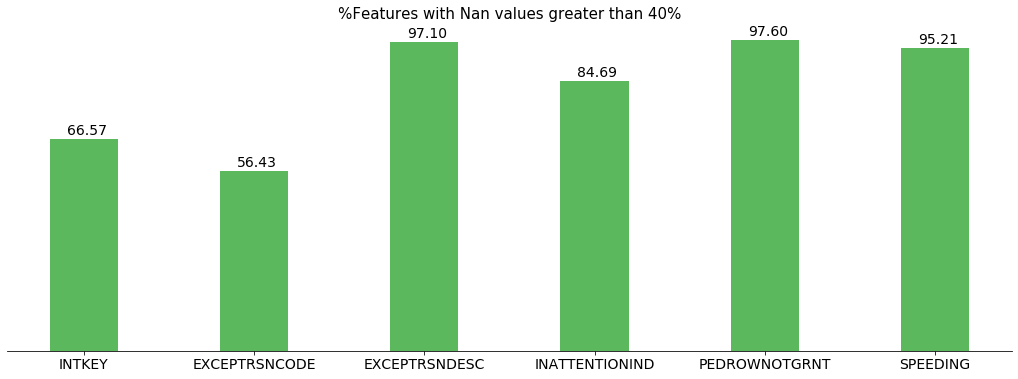

In [6]:
ax = nulls.plot(kind='bar', figsize=(18, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('%Features with Nan values greater than 40%', fontsize=15)
ax.tick_params(axis="x", labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels = nulls.index
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height() + 1.5),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);

### Label feature balance

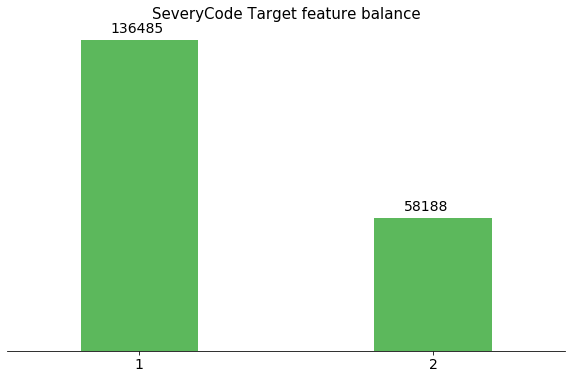

In [7]:
ax = df['SEVERITYCODE'].value_counts().plot(kind='bar', figsize=(10, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('SeveryCode Target feature balance', fontsize=15)
ax.tick_params(axis="x", labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels =df['SEVERITYCODE'].value_counts().index
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+3500),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);


#### JUNCTIONTYPE vs ADDRTYPE 

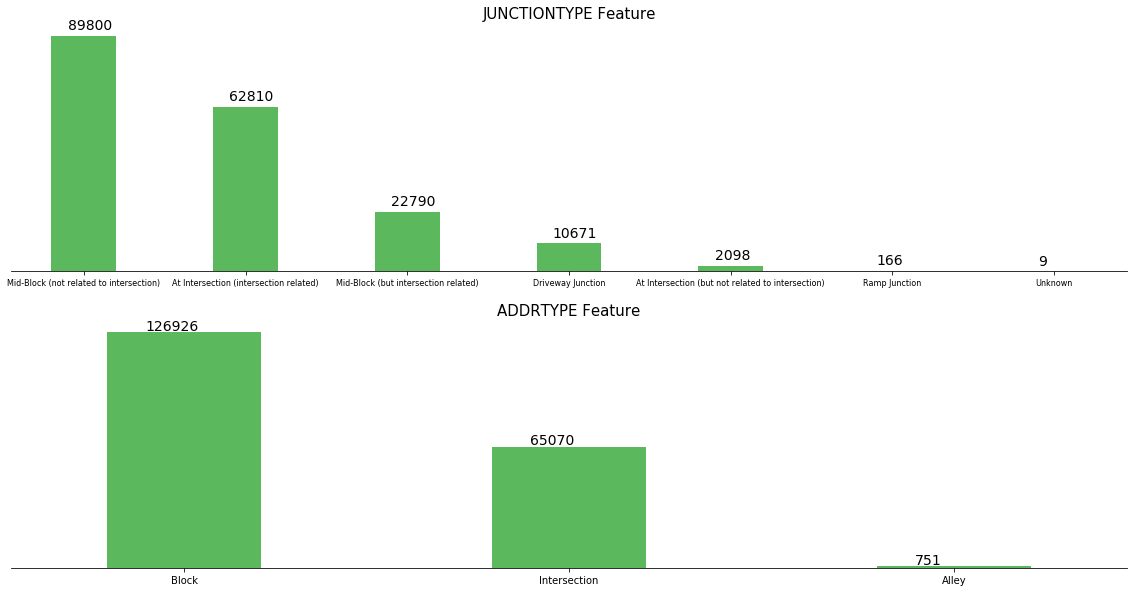

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10)) 
df['JUNCTIONTYPE'].value_counts().plot(ax=ax[0], kind='bar', width=0.4, color=['#5cb85c'])
ax[0].set_title('JUNCTIONTYPE Feature', fontsize=15)
ax[0].tick_params(axis="x", labelsize=8)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].get_yaxis().set_ticks([])
xticklabels = df['JUNCTIONTYPE'].value_counts().index
for p in ax[0].patches:
    ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height() + 2500),fontsize=14)
ax[0].set_xticklabels(xticklabels, rotation = 0);
#-------
df['ADDRTYPE'].value_counts().plot(ax=ax[1], kind='bar', width=0.4, color=['#5cb85c'])
ax[1].set_title('ADDRTYPE Feature', fontsize=15)
ax[1].tick_params(axis="x", labelsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].get_yaxis().set_ticks([])
xticklabels = df['ADDRTYPE'].value_counts().index
for p in ax[1].patches:
    ax[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height() + 1500),fontsize=14)
ax[1].set_xticklabels(xticklabels, rotation = 0);

#### Collision type feature

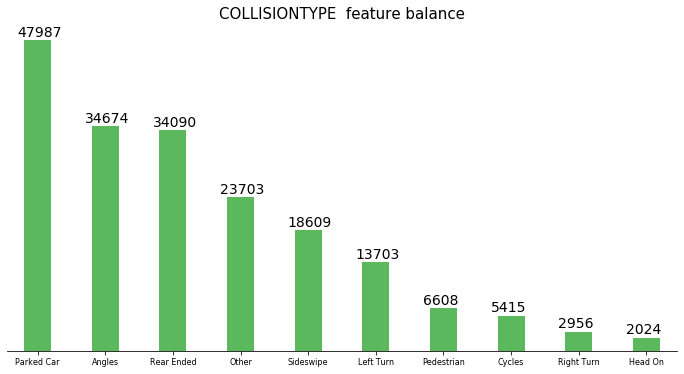

In [9]:
ax = df['COLLISIONTYPE'].value_counts().plot(kind='bar', figsize=(12, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('COLLISIONTYPE  feature balance', fontsize=15)
ax.tick_params(axis="x", labelsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels =df['COLLISIONTYPE'].value_counts().index
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.10, p.get_height()+600),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);

#### SDOT_COLCODE vs ST_COLCODE

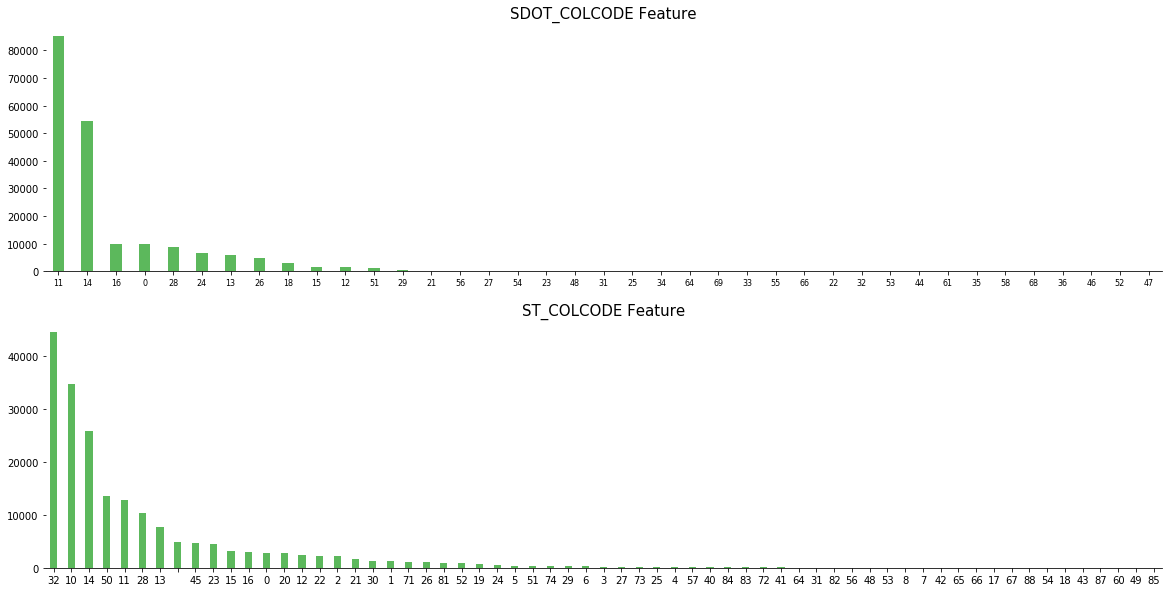

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10)) 
df['SDOT_COLCODE'].value_counts().plot(ax=ax[0], kind='bar', width=0.4, color=['#5cb85c'])
ax[0].set_title('SDOT_COLCODE Feature', fontsize=15)
ax[0].tick_params(axis="x", labelsize=8)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
xticklabels = df['SDOT_COLCODE'].value_counts().index
ax[0].set_xticklabels(xticklabels, rotation = 0);
#-------
df['ST_COLCODE'].value_counts().plot(ax=ax[1], kind='bar', width=0.4, color=['#5cb85c'])
ax[1].set_title('ST_COLCODE Feature', fontsize=15)
ax[1].tick_params(axis="x", labelsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
xticklabels = df['ST_COLCODE'].value_counts().index
ax[1].set_xticklabels(xticklabels, rotation = 0);

#### ROADCONDITION, WEATHER  FEATURES COMPARISON

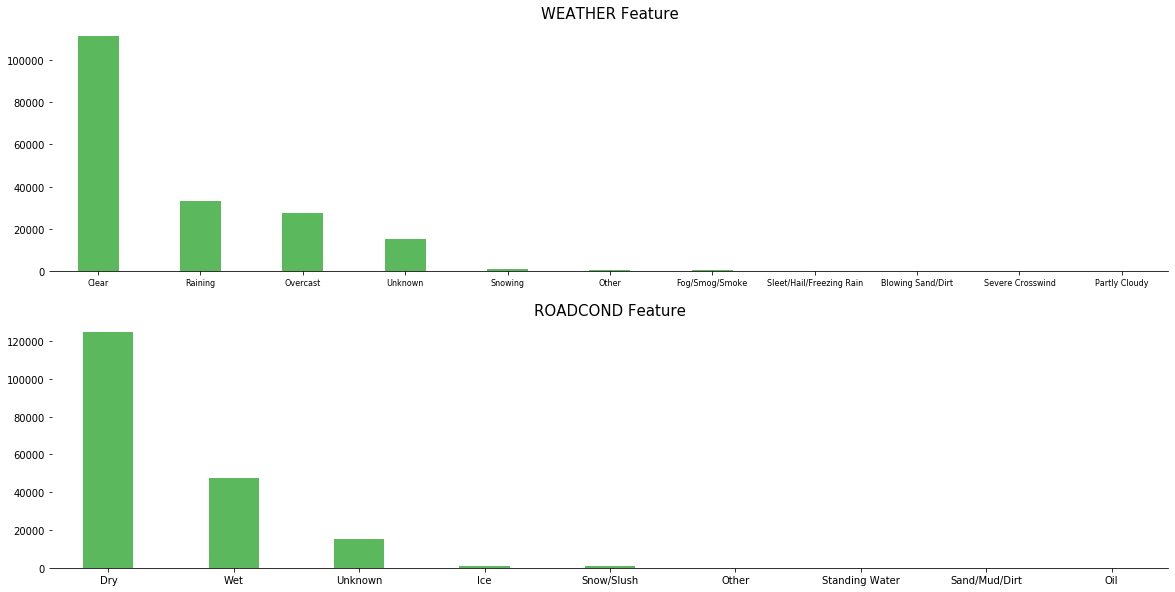

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10)) 
df['WEATHER'].value_counts().plot(ax=ax[0], kind='bar', width=0.4, color=['#5cb85c'])
ax[0].set_title('WEATHER Feature', fontsize=15)
ax[0].tick_params(axis="x", labelsize=8)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
xticklabels = df['WEATHER'].value_counts().index
ax[0].set_xticklabels(xticklabels, rotation = 0)
#-------
df['ROADCOND'].value_counts().plot(ax=ax[1], kind='bar', width=0.4, color=['#5cb85c'])
ax[1].set_title('ROADCOND Feature', fontsize=15)
ax[1].tick_params(axis="x", labelsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
xticklabels = df['ROADCOND'].value_counts().index
ax[1].set_xticklabels(xticklabels, rotation = 0);

#### PERSONCOUNT and VEHCOUNT

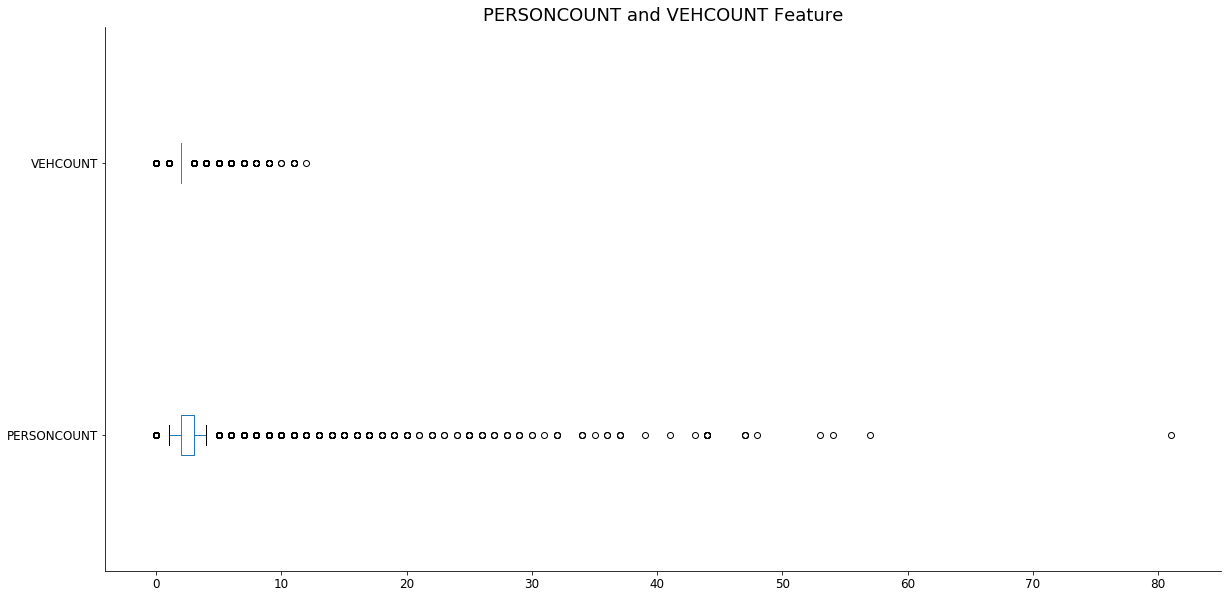

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
df[['PERSONCOUNT','VEHCOUNT']].plot(kind='box',ax=ax, vert=False)
ax.set_title('PERSONCOUNT and VEHCOUNT Feature', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
#xticklabels = df['PERSONCOUNT'].value_counts().index
#-------


#### UNDERINFL Feature

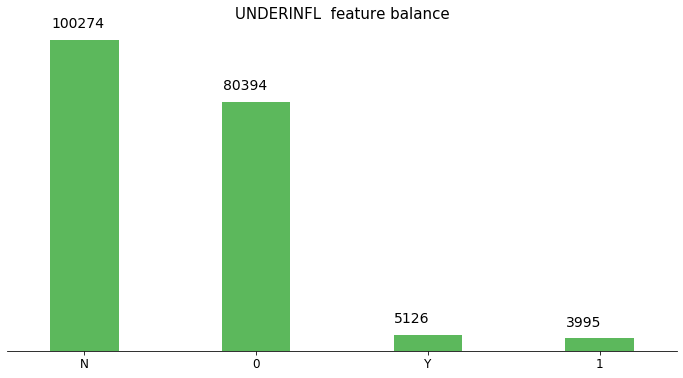

In [13]:
ax = df['UNDERINFL'].value_counts().plot(kind='bar', figsize=(12, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('UNDERINFL  feature balance', fontsize=15)
ax.tick_params(axis="x", labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels =df['UNDERINFL'].value_counts().index
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.005, p.get_height()+4000),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);

In [14]:
features = ['SEVERITYCODE','X','Y', 'COLLISIONTYPE', 'VEHCOUNT', 'PERSONCOUNT', 'INCDTTM', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE']

In [15]:
df[features].describe(include='all')

,SEVERITYCODE,X,Y,COLLISIONTYPE,VEHCOUNT,PERSONCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE
count,194673.000000,189339.000000,189339.000000,189769,194673.000000,194673.000000,194673,188344,189789,189661,189503,194655
unique,NaN,NaN,NaN,10,NaN,NaN,162058,7,4,9,9,63
top,NaN,NaN,NaN,Parked Car,NaN,NaN,11/2/2006,Mid-Block (not related to intersection),N,Dry,Daylight,32
freq,NaN,NaN,NaN,47987,NaN,NaN,96,89800,100274,124510,116137,44421
mean,1.298901,-122.330518,47.619543,NaN,1.920780,2.444427,NaN,NaN,NaN,NaN,NaN,NaN
std,0.457778,0.029976,0.056157,NaN,0.631047,1.345929,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-122.419091,47.495573,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,-122.348673,47.575956,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,-122.330224,47.615369,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,-122.311937,47.663664,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


# DATA PREPARATION

#### Get the features and target to be used from the general DataSet

In [16]:
churn_df = df[features].copy()
churn_df.head()

,SEVERITYCODE,X,Y,COLLISIONTYPE,VEHCOUNT,PERSONCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,-122.323148,47.703140,Angles,2,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Wet,Daylight,10
1,1,-122.347294,47.647172,Sideswipe,2,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Wet,Dark - Street Lights On,11
2,1,-122.334540,47.607871,Parked Car,3,4,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Dry,Daylight,32
3,1,-122.334803,47.604803,Other,3,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Dry,Daylight,23
4,2,-122.306426,47.545739,Angles,2,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Wet,Daylight,10


#### Explore the datatypes for each feature

In [17]:
churn_df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
COLLISIONTYPE     object
VEHCOUNT           int64
PERSONCOUNT        int64
INCDTTM           object
JUNCTIONTYPE      object
UNDERINFL         object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
dtype: object

#### Explore the Nan values

In [18]:
churn_df.isnull().sum()/len(df)*100

SEVERITYCODE     0.000000
X                2.739979
Y                2.739979
COLLISIONTYPE    2.519096
VEHCOUNT         0.000000
PERSONCOUNT      0.000000
INCDTTM          0.000000
JUNCTIONTYPE     3.251093
UNDERINFL        2.508822
ROADCOND         2.574574
LIGHTCOND        2.655736
ST_COLCODE       0.009246
dtype: float64

### Total rows with Nan Values

In [19]:
print('%Nan values in the Dataset: {:.2f}'.format(churn_df.isnull().sum().sum()/len(df)*100))

%Nan values in the Dataset: 19.00


### Drop the Nan values from the Dataset as strategy to clean the null values

In [20]:
churn_df.dropna(inplace=True)

In [21]:
churn_df.shape

(180167, 12)

### PERSONCOUNT and VEHCOUNT FEATURE Processing

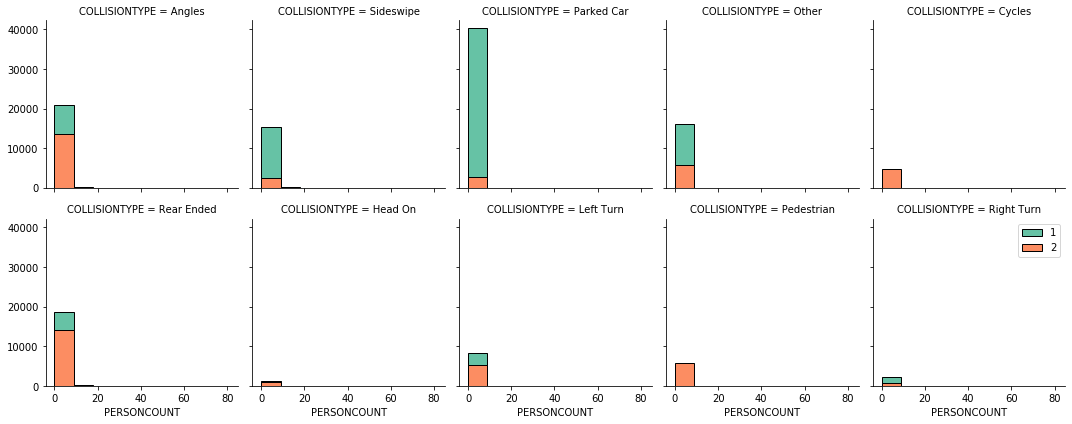

In [22]:
bins = np.linspace(churn_df.PERSONCOUNT.min(), churn_df.PERSONCOUNT.max(), 10)
g = sns.FacetGrid(churn_df, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=5)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[-1].legend();

### Remove outliers from the PERSONCOUNT Feature

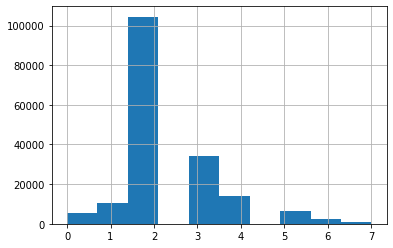

In [23]:
#Calculate range to exclude the outliers
x = churn_df.PERSONCOUNT
upper, lower = np.percentile(x, [1,99])
y = np.clip(x, upper, lower)
indexPersoncnt = churn_df[ churn_df['PERSONCOUNT'] != y].index
churn_df.drop(indexPersoncnt , inplace=True)
churn_df.PERSONCOUNT.hist();

### VEHCOUNT FEATURE Processing

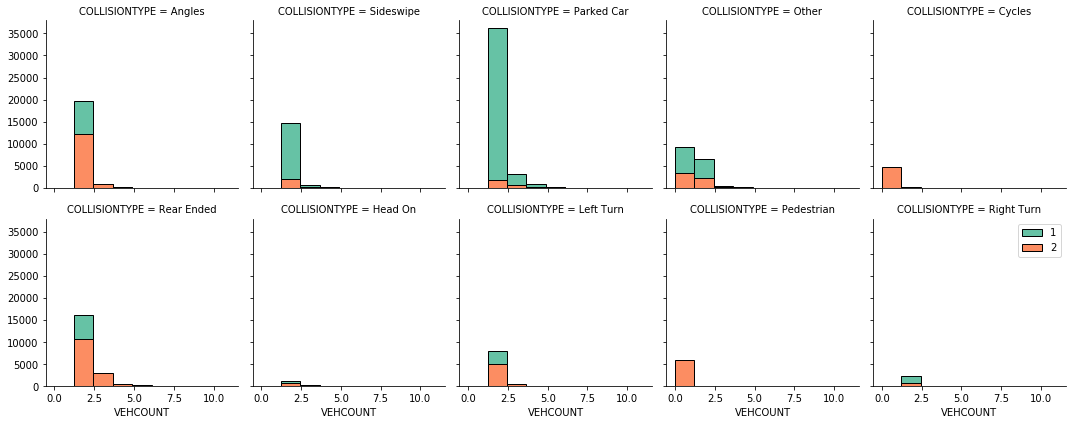

In [24]:
bins = np.linspace(churn_df.VEHCOUNT.min(), churn_df.VEHCOUNT.max(), 10)
g = sns.FacetGrid(churn_df, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=5)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend();

### Remove outliers from the VEHCOUNT Feature

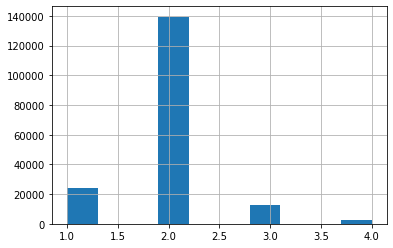

In [25]:
#Calculate range to exclude the outliers
x = churn_df.VEHCOUNT
upper, lower = np.percentile(x, [1,99])
y = np.clip(x, upper, lower)
indexVehcnt = churn_df[ churn_df['VEHCOUNT'] != y].index
churn_df.drop(indexVehcnt , inplace=True)
churn_df.VEHCOUNT.hist();

### Normalize de X and Y Coordinates

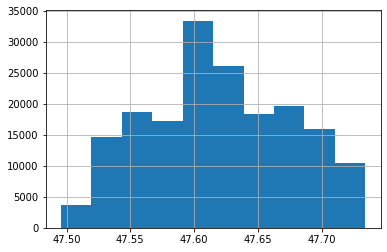

In [26]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#long_rs = churn_df.Y.to_numpy().reshape(-1, 1)
#churn_df.Y = scaler.fit_transform(long_rs)
churn_df.Y.hist();


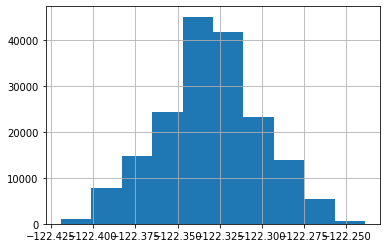

In [27]:
#scaler = MinMaxScaler()
#lat_rs = churn_df.X.to_numpy().reshape(-1, 1)
#churn_df.X = scaler.fit_transform(lat_rs)
churn_df.X.hist();

### Code the collision type

In [28]:
churn_df['COLLISIONTYPE'].value_counts()

Parked Car    42487
Angles        34055
Rear Ended    32310
Other         21832
Sideswipe     17671
Left Turn     13489
Pedestrian     6469
Cycles         5141
Right Turn     2858
Head On        1953
Name: COLLISIONTYPE, dtype: int64

In [29]:
coltype = churn_df[['COLLISIONTYPE']].values
coltype

array([['Angles'],
       ['Sideswipe'],
       ['Parked Car'],
       ...,
       ['Left Turn'],
       ['Cycles'],
       ['Rear Ended']], dtype=object)

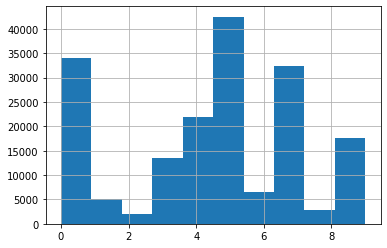

In [30]:
from sklearn import preprocessing
le_coltype = preprocessing.LabelEncoder()
le_coltype.fit(['Parked Car','Angles','Rear Ended', 'Other', 'Sideswipe','Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'])
churn_df['COLLISIONTYPE']=le_coltype.transform(coltype[:,0]) 
churn_df.COLLISIONTYPE.hist();

### Convert the INCDTTM to day of the week

In [31]:
churn_df['DayofWeek'] = pd.to_datetime(churn_df['INCDTTM']).dt.dayofweek
churn_df.drop(columns=['INCDTTM'], inplace=True)

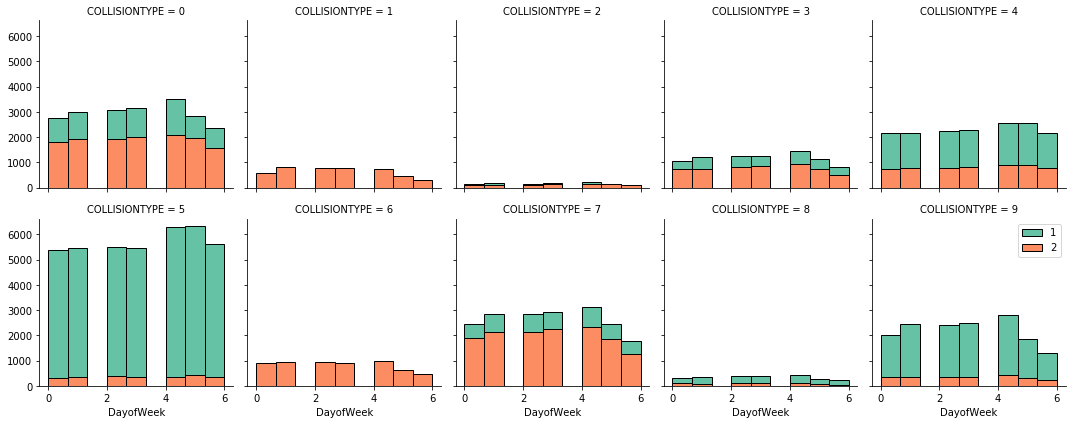

In [32]:
bins = np.linspace(churn_df.DayofWeek.min(), churn_df.DayofWeek.max(), 10)
g = sns.FacetGrid(churn_df, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=5)
g.map(plt.hist, 'DayofWeek', bins=bins, ec="k")

g.axes[-1].legend();

### Code the JUNCTIONTYPE Feature

In [33]:
churn_df.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              83576
At Intersection (intersection related)               60372
Mid-Block (but intersection related)                 21805
Driveway Junction                                    10363
At Intersection (but not related to intersection)     2008
Ramp Junction                                          136
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

In [34]:
juntype = churn_df[['JUNCTIONTYPE']].values
juntype


array([['At Intersection (intersection related)'],
       ['Mid-Block (not related to intersection)'],
       ['Mid-Block (not related to intersection)'],
       ...,
       ['At Intersection (intersection related)'],
       ['At Intersection (intersection related)'],
       ['Mid-Block (not related to intersection)']], dtype=object)

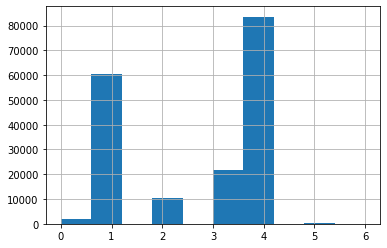

In [35]:
le_juntype = preprocessing.LabelEncoder()
le_juntype.fit(['At Intersection (but not related to intersection)','Unknown','Ramp Junction','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)', 'At Intersection (intersection related)'])
churn_df['JUNCTIONTYPE']=le_juntype.transform(juntype[:,0]) 
churn_df.JUNCTIONTYPE.hist();

### Code the feature UNDERINFL 

In [36]:
churn_df.UNDERINFL.value_counts()

N    92838
0    76837
Y     4824
1     3766
Name: UNDERINFL, dtype: int64

#### Replae N with 0, Y with 1 and convert to number

In [37]:
churn_df.replace({'UNDERINFL': {'Y': 1, 'N': 0}}, inplace=True)
churn_df['UNDERINFL'] = churn_df['UNDERINFL'].astype('int')

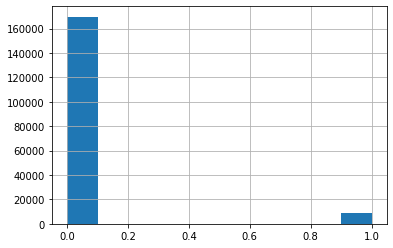

In [38]:
churn_df.UNDERINFL.hist();

### Code ROADCOND Feature

In [39]:
churn_df.ROADCOND.value_counts()

Dry               119312
Wet                45151
Unknown            11385
Ice                 1141
Snow/Slush           958
Other                112
Standing Water        98
Sand/Mud/Dirt         60
Oil                   48
Name: ROADCOND, dtype: int64

In [40]:
roadtype = churn_df[['ROADCOND']].values
roadtype

array([['Wet'],
       ['Wet'],
       ['Dry'],
       ...,
       ['Dry'],
       ['Dry'],
       ['Wet']], dtype=object)

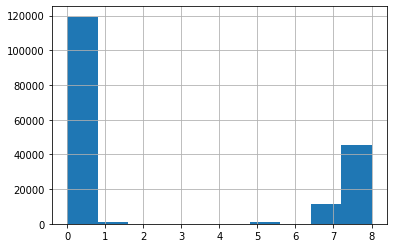

In [41]:
le_roadtype = preprocessing.LabelEncoder()
le_roadtype.fit(['Dry','Wet','Unknown','Ice','Snow/Slush', 'Other','Standing Water','Sand/Mud/Dirt','Oil'])
churn_df['ROADCOND']=le_roadtype.transform(roadtype[:,0]) 
churn_df.ROADCOND.hist();

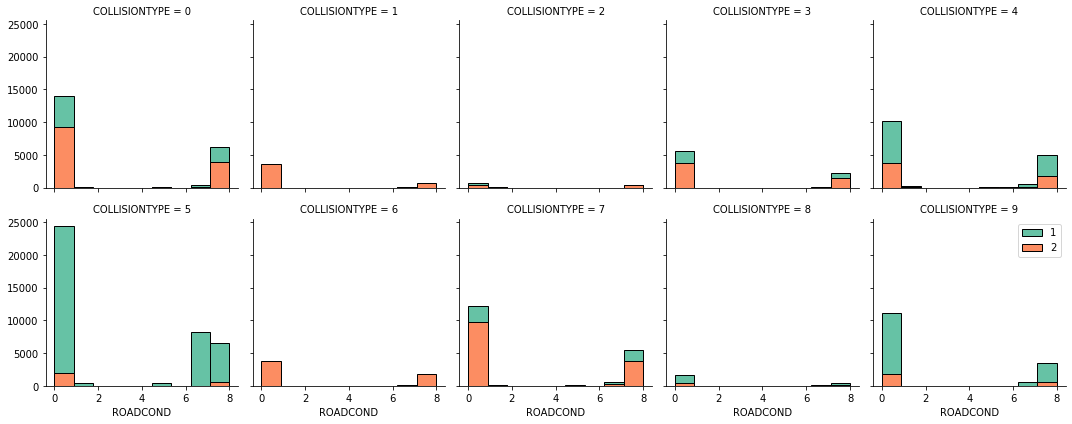

In [42]:
bins = np.linspace(churn_df.ROADCOND.min(), churn_df.ROADCOND.max(), 10)
g = sns.FacetGrid(churn_df, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=5)
g.map(plt.hist, 'ROADCOND', bins=bins, ec="k")

g.axes[-1].legend();

### LIGHTCOND feature processing

In [43]:
churn_df.LIGHTCOND.value_counts()

Daylight                    111090
Dark - Street Lights On      46101
Unknown                      10336
Dusk                          5664
Dawn                          2367
Dark - No Street Lights       1404
Dark - Street Lights Off      1122
Other                          170
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [44]:
lighttype = churn_df[['LIGHTCOND']].values
lighttype


array([['Daylight'],
       ['Dark - Street Lights On'],
       ['Daylight'],
       ...,
       ['Daylight'],
       ['Dusk'],
       ['Daylight']], dtype=object)

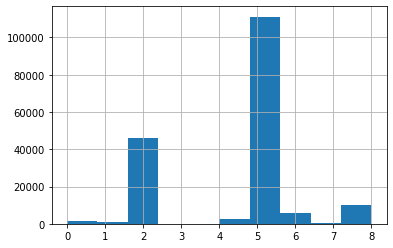

In [45]:
le_lighttype = preprocessing.LabelEncoder()
le_lighttype.fit(['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'])
churn_df['LIGHTCOND']=le_lighttype.transform(lighttype[:,0]) 
churn_df.LIGHTCOND.hist();

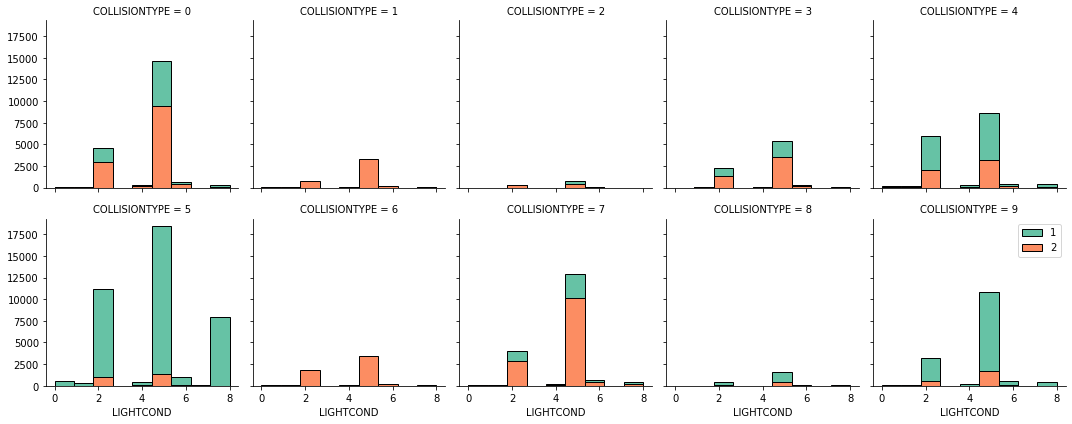

In [46]:
bins = np.linspace(churn_df.LIGHTCOND.min(), churn_df.LIGHTCOND.max(), 10)
g = sns.FacetGrid(churn_df, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=5)
g.map(plt.hist, 'LIGHTCOND', bins=bins, ec="k")

g.axes[-1].legend();

### ST_COLCODE feature processing

In [47]:
churn_df.ST_COLCODE.value_counts()

32    39032
10    34055
14    24583
50    12160
11    12049
      ...  
87        2
43        2
49        1
60        1
85        1
Name: ST_COLCODE, Length: 61, dtype: int64

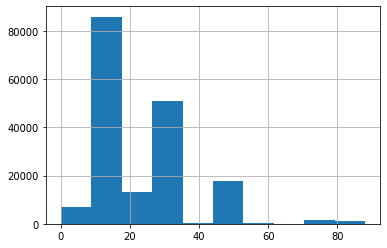

In [48]:
churn_df['ST_COLCODE'] = churn_df['ST_COLCODE'].astype('int')
churn_df.ST_COLCODE.hist();

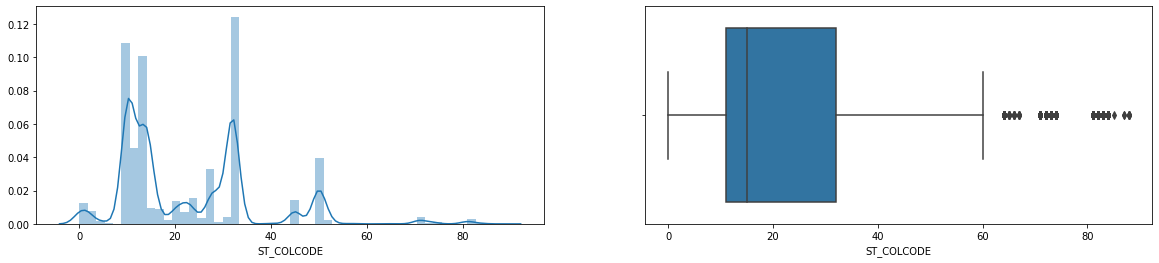

In [49]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(churn_df['ST_COLCODE'])
f.add_subplot(1,2,2)
sns.boxplot(churn_df['ST_COLCODE']);


### Check that all the feature are numerical types to start modelling

In [50]:
churn_df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
COLLISIONTYPE      int64
VEHCOUNT           int64
PERSONCOUNT        int64
JUNCTIONTYPE       int64
UNDERINFL          int64
ROADCOND           int64
LIGHTCOND          int64
ST_COLCODE         int64
DayofWeek          int64
dtype: object

### Balance the target feature

In [51]:
sev_code = churn_df['SEVERITYCODE'].value_counts().to_frame()
sev_code

,SEVERITYCODE
1,123471
2,54794


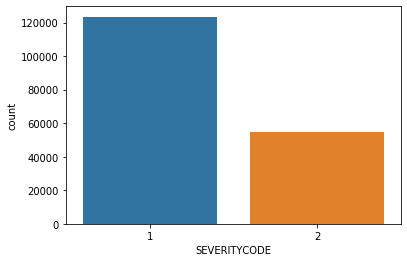

In [52]:
sns.countplot(churn_df['SEVERITYCODE']);

In [53]:
## Split the dataset in two acoording with the target classes
churn_df_1 = churn_df[churn_df['SEVERITYCODE']==1].copy()
churn_df_2 = churn_df[churn_df['SEVERITYCODE']==2].copy()

In [54]:
#Generate an array of random indexes according the size of minor class
random_idx = np.random.permutation(sev_code.min()[0])

# Subsample the biggest dataset as a first strategy to balance de dataset
churn_df1_sub_sample = churn_df_1.iloc[random_idx].copy()
churn_df1_sub_sample.shape

(54794, 12)

In [55]:
from sklearn.utils import resample
sample = 1000

churn_df1_downsample = resample(churn_df1_sub_sample,replace = False, n_samples = sample, random_state = 27) 
churn_df2_downsample = resample(churn_df_2,replace = False, n_samples = sample, random_state = 27) 

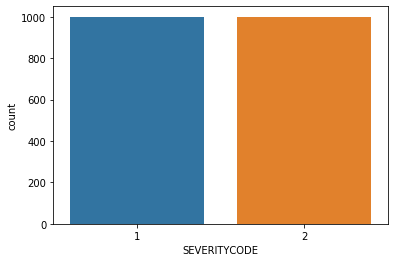

In [57]:
#Put togehter both sub dataframes
#churn_dfT = churn_df1_sub_sample.append(churn_df_2)
churn_dfT = churn_df1_downsample.append(churn_df2_downsample)
sns.countplot(churn_dfT['SEVERITYCODE']);

### Select and Normalize all the features

In [58]:
features = ['X','Y', 'COLLISIONTYPE', 'VEHCOUNT', 'PERSONCOUNT', 'DayofWeek', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE']
X = np.asarray(churn_dfT[features])
X[0:5]

array([[-122.2693221 ,   47.53763755,    5.        ,    2.        ,
           2.        ,    2.        ,    3.        ,    0.        ,
           7.        ,    5.        ,   32.        ],
       [-122.3206031 ,   47.71039531,    4.        ,    2.        ,
           2.        ,    2.        ,    2.        ,    0.        ,
           0.        ,    5.        ,   21.        ],
       [-122.3476108 ,   47.61973935,    0.        ,    2.        ,
           5.        ,    3.        ,    1.        ,    0.        ,
           0.        ,    2.        ,   10.        ],
       [-122.3094821 ,   47.69486901,    0.        ,    2.        ,
           2.        ,    4.        ,    1.        ,    0.        ,
           0.        ,    2.        ,   10.        ],
       [-122.3554531 ,   47.61860207,    9.        ,    2.        ,
           2.        ,    0.        ,    0.        ,    0.        ,
           8.        ,    5.        ,   11.        ]])

In [59]:
y = churn_dfT['SEVERITYCODE'].values
y[0:5]


array([1, 1, 1, 1, 1])

In [60]:
from sklearn import preprocessing
#X= preprocessing.StandardScaler().fit(X).transform(X)
X= preprocessing.MinMaxScaler().fit(X).transform(X)
X[0:5]

array([[0.82417722, 0.16257378, 0.55555556, 0.33333333, 0.28571429,
        0.33333333, 0.6       , 0.        , 0.875     , 0.625     ,
        0.38554217],
       [0.52731957, 0.89882493, 0.44444444, 0.33333333, 0.28571429,
        0.33333333, 0.4       , 0.        , 0.        , 0.625     ,
        0.25301205],
       [0.37097625, 0.51247149, 0.        , 0.33333333, 0.71428571,
        0.5       , 0.2       , 0.        , 0.        , 0.25      ,
        0.12048193],
       [0.59169729, 0.83265565, 0.        , 0.33333333, 0.28571429,
        0.66666667, 0.2       , 0.        , 0.        , 0.25      ,
        0.12048193],
       [0.32557841, 0.50762468, 1.        , 0.33333333, 0.28571429,
        0.        , 0.        , 0.        , 1.        , 0.625     ,
        0.13253012]])

# MODELING

## Models to be used:

- ### KNN
- ### SVM
- ### Logistic Regression

### Split the dataset in train and  testing datasets

In [62]:
#Train test split to be used for all the models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1600, 11) (1600,)
Test set: (400, 11) (400,)


### Split the train data in train and evaluation dataset for hyperparameters adjustments

In [64]:
X_train, X_eval, y_train, y_eval, = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Eval set:', X_eval.shape,  y_eval.shape)

Train set: (1600, 11) (1600,)
Eval set: (400, 11) (400,)


## KNN MODEL

In [65]:
#Import library for KNN
from sklearn.neighbors import KNeighborsClassifier

In [66]:
#Accuracy evaluation
from sklearn import metrics


In [76]:
#Testing for other K Values

p=1
Ks = 45
leafsize = 25
algorithm = 'auto'

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n, leaf_size=leafsize,p=1, algorithm=algorithm).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_eval, yhat)

    
    std_acc[n-1]=np.std(yhat==y_eval)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65  , 0.6475, 0.665 , 0.6725, 0.69  , 0.6925, 0.7   , 0.675 ,
       0.685 , 0.685 , 0.69  , 0.685 , 0.7   , 0.6925, 0.6825, 0.68  ,
       0.6925, 0.68  , 0.685 , 0.68  , 0.69  , 0.685 , 0.705 , 0.6925,
       0.7   , 0.705 , 0.7025, 0.6975, 0.7025, 0.71  , 0.7175, 0.7   ,
       0.71  , 0.7125, 0.705 , 0.7175, 0.7275, 0.7175, 0.7225, 0.715 ,
       0.725 , 0.72  , 0.725 , 0.725 ])

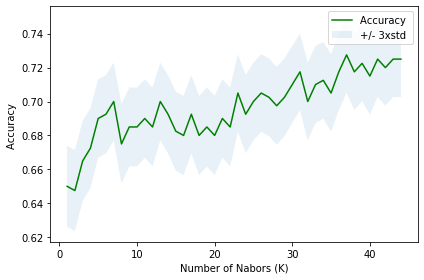

In [77]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [72]:

k = 24 #The highest accuracy
leaf = 25
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k, leaf_size=leaf, algorithm='auto',p=1).fit(X_train,y_train)
neigh

#Predicting
yhat = neigh.predict(X_eval)
yhat[0:5]

array([1, 1, 2, 1, 1])

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

#Checking performance our model with ROC Score.
roc_auc_score(y_eval, yhat)

0.6909263705482194

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(25,30))
n_neighbors = list(range(20,100))
p=[1]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, algorithm=algorithm)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters,scoring = 'f1',verbose=1)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Algorithm:', best_model.best_estimator_.get_params()['algorithm'])

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [81]:
yhat = best_model.predict(X_eval)
roc_auc_score(y_eval, yhat)

0.7088835534213684

In [82]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_eval, yhat, average='weighted')
knn_f1

0.7089800020098482

### DECISION TREE

In [311]:
from sklearn.tree import DecisionTreeClassifier

In [316]:
#Modeling
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
loanTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [317]:
#Trainning
loanTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [318]:
#Prediction
predTree = loanTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 2]
[1 1 1 2 1]


### Support Vector Machine

In [83]:
#Import library
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [88]:
#Modeling using Radial basis function (RBF) as kernel
gamma = 1
kernel = 'rbf'
C = 1
svc_svm = svm.SVC(kernel=kernel, C=C, gamma=gamma)
svc_svm.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
#Prediction
yhat = svc_svm.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [84]:
from sklearn.svm import SVC 

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

best_model = grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   46.4s finished


In [85]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
#Predict values based on new parameters
y_pred_acc = best_model.predict(X_eval)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

print('Best Algorithm:', best_model.best_estimator_.get_params())

Accuracy Score : 0.71
Precision Score : 0.7075471698113207
Recall Score : 0.7352941176470589
F1 Score : 0.7211538461538461
Best Algorithm: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### Logistic regression

In [86]:
#Import library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [402]:
#Model using solver linear / solver='sag'
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

clf = LogisticRegression()
grid_values = {'class_weight':['balanced'],'solver':['liblinear','saga'],'penalty': ['l1','l2'],'C':[0.001,0.005,0.01,0.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1')
best_model = grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

print('Best Algorithm:', best_model.best_estimator_.get_params())

Accuracy Score : 0.51
Precision Score : 0.51
Recall Score : 1.0
F1 Score : 0.6754966887417219
Best Algorithm: {'C': 0.001, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [403]:
#Predict
yhat = LR.predict(X_test)
yhat[:5]

array([2, 1, 1, 2, 2])

In [426]:
#Prediction probability
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.48, 0.52],
       [0.6 , 0.4 ],
       [0.69, 0.31],
       [0.37, 0.63],
       [0.47, 0.53]])

# EVALUATION

## Using the test set, different metrics will be used to evaluate the diffents modells:

- F1 Score
- Jaccard Index
- Accuracy
- Log loss

## Evaluate the predictions using each trainned model with the test set

In [431]:
#Predicting using KNN using K=11 best result
yhat_knn = neigh.predict(X_test)
yhat_knn[0:5]

array([2, 2, 1, 2, 2])

In [432]:
# Predicting using SVM model
yhat_svm = svc_svm.predict(X_test)
yhat_svm[0:5]

array([2, 2, 1, 2, 2])

In [433]:
# Predicting using Logistic Regression
yhat_lr = LR.predict(X_test)
yhat_lr[:5]

#Prediction probability
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]


array([[0.48, 0.52],
       [0.6 , 0.4 ],
       [0.69, 0.31],
       [0.37, 0.63],
       [0.47, 0.53]])

In [434]:
#Import metrics from sklearn

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss


## Calcule the different index using the yhat predicted by each model

In [435]:
knn_f1 = f1_score(y_test, yhat_knn, average='weighted')
knn_jc = jaccard_similarity_score(y_test, yhat_knn)
knn_acc = metrics.accuracy_score(y_test, yhat_knn)

svm_f1 = f1_score(y_test, yhat_svm, average='weighted')
svm_jc = jaccard_similarity_score(y_test, yhat_svm)
svm_acc = metrics.accuracy_score(y_test, yhat_svm)

lr_f1 = f1_score(y_test, yhat_lr, average='weighted', labels=np.unique(yhat_lr))
lr_jc = jaccard_similarity_score(y_test, yhat_lr)
lr_acc = metrics.accuracy_score(y_test, yhat_lr)
lr_loss =log_loss(y_test, yhat_prob)

/Users/rafaelmata357/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Function to graph confusion matrix from course materials 

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def ax_plot_confusion_matrix(cm, classes,ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
      
   
    plt.sca(ax)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


NameError: name 'plt' is not defined

## Create a report with different index together

In [443]:
report_df = pd.DataFrame({'Algorithm':['KNN','SVM', 'LogisticRegression'], 'Jaccard':[knn_jc, svm_jc, lr_jc], 'F1-score':[knn_f1, svm_f1, lr_f1], 'Accuracy':[knn_acc, svm_acc, lr_acc], 'LogLoss':['NA', 'NA', lr_loss]} )


In [444]:
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
HTML(report_df.to_html(index=False))

Algorithm,Jaccard,F1-score,Accuracy,LogLoss
KNN,0.697646,0.697566,0.697646,NA
SVM,0.713478,0.711152,0.713478,NA
LogisticRegression,0.642668,0.642155,0.642668,0.632848


## Classification report for each model

In [1]:
print (classification_report(y_test, yhat_knn))

NameError: name 'classification_report' is not defined

In [446]:
print (classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           1       0.75      0.62      0.68     10863
           2       0.68      0.80      0.74     11055

    accuracy                           0.71     21918
   macro avg       0.72      0.71      0.71     21918
weighted avg       0.72      0.71      0.71     21918



In [447]:
print (classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           1       0.63      0.68      0.65     10863
           2       0.66      0.60      0.63     11055

    accuracy                           0.64     21918
   macro avg       0.64      0.64      0.64     21918
weighted avg       0.64      0.64      0.64     21918



### Confusion matrix for each model

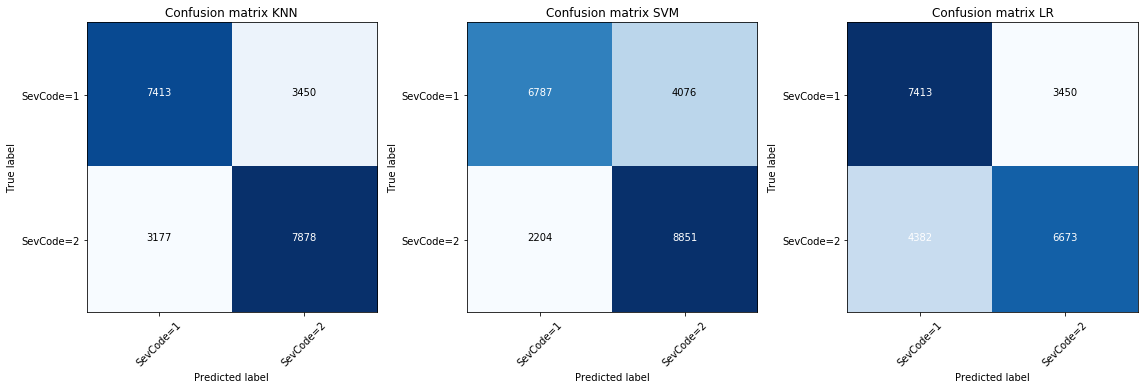

In [477]:
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(y_test, yhat_knn, labels=[1,2])
cnf_matrix_svm = confusion_matrix(y_test, yhat_svm, labels=[1,2])
cnf_matrix_lr = confusion_matrix(y_test, yhat_lr, labels=[1,2])
np.set_printoptions(precision=2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))  #Generate subplots 3 x 2 
# Plot non-normalized confusion matrix
ax_plot_confusion_matrix(cnf_matrix_knn, classes=['SevCode=1','SevCode=2'],ax=ax[0], normalize= False,  title='Confusion matrix KNN')
ax_plot_confusion_matrix(cnf_matrix_svm, classes=['SevCode=1','SevCode=2'],ax=ax[1], normalize= False,  title='Confusion matrix SVM')
ax_plot_confusion_matrix(cnf_matrix_lr, classes=['SevCode=1','SevCode=2'],ax=ax[2], normalize= False,  title='Confusion matrix LR')

# DEPLOYMENT